In [1]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image,display
%matplotlib inline
from sklearn_extra.cluster import KMedoids


In [2]:
df=pd.read_csv('wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df2=df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
train_dict=pd.DataFrame(df.dtypes,columns=['Data types'])
train_dict['null']=df.isnull().sum()
train_dict['unique vals']=df.nunique()
train_dict['count']=df.count()
train_dict

,Data types,null,unique vals,count
Alcohol,float64,0,126,178
Malic_Acid,float64,0,133,178
Ash,float64,0,79,178
Ash_Alcanity,float64,0,63,178
Magnesium,int64,0,53,178
Total_Phenols,float64,0,97,178
Flavanoids,float64,0,132,178
Nonflavanoid_Phenols,float64,0,39,178
Proanthocyanins,float64,0,101,178
Color_Intensity,float64,0,132,178


Data preprocessing

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(df)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Kmedoids

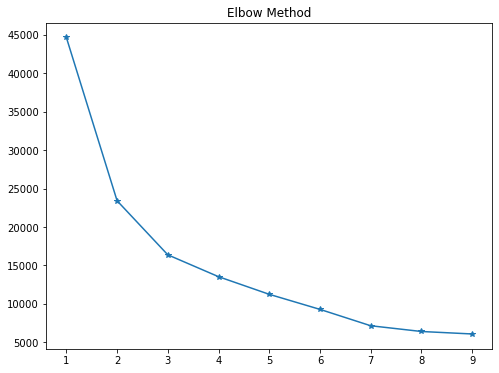

In [8]:
#elbow method to know the number of clusters
ints=[]
for i in range(1,10):
    kmedoids=KMedoids(n_clusters=i,init="k-medoids++")
    kmedoids.fit_predict(df)
    ints.append(kmedoids.inertia_)
plt.figure(figsize=(8,6))
plt.plot(range(1,10),ints, marker="*")
plt.title("Elbow Method")
plt.show()

In [9]:
cluster=KMedoids(n_clusters=3,metric="manhattan",init='random',random_state=100)
y_pridect=cluster.fit_predict(df)
y_pridect

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2], dtype=int64)

In [10]:
df['cluster']=y_pridect

In [15]:
centers=cluster.cluster_centers_
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced=pd.DataFrame(pca.fit_transform(df),columns=['PCA1','PCA2'])
reduced['cluster']=y_pridect
reduced_centers=pca.fit_transform(cluster.cluster_centers_)
reduced_centers


array([[ 406.00960157,   -3.0156107 ],
       [ -98.86676825,   10.32567096],
       [-307.14283333,   -7.31006025]])

Visualizing

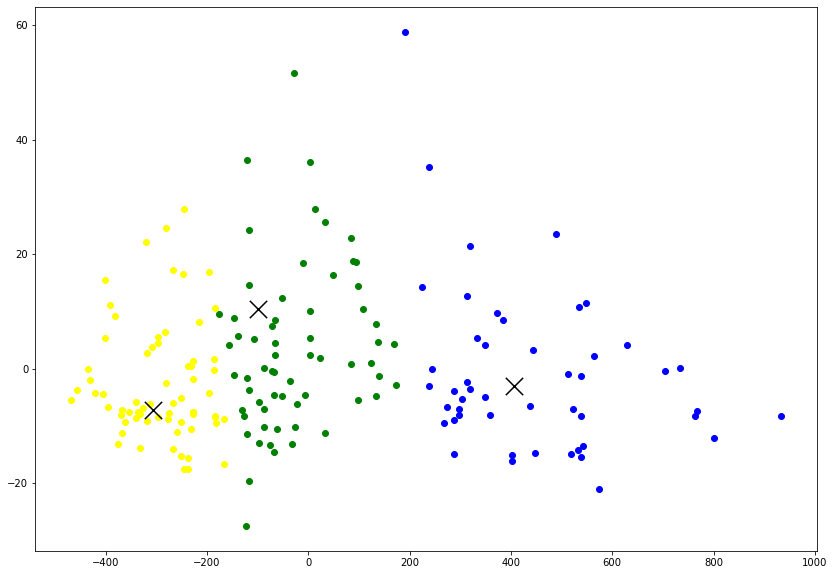

In [21]:
#plotting clusters

plt.figure(figsize=(14,10))
plt.scatter(reduced[reduced['cluster'] == 0].loc[:, 'PCA1'], reduced[reduced['cluster'] == 0].loc[:, 'PCA2'], color='blue')
plt.scatter(reduced[reduced['cluster'] == 1].loc[:, 'PCA1'], reduced[reduced['cluster'] == 1].loc[:, 'PCA2'], color='green')
plt.scatter(reduced[reduced['cluster'] == 2].loc[:, 'PCA1'], reduced[reduced['cluster'] == 2].loc[:, 'PCA2'], color='yellow')
#plotting centers
plt.scatter(x=reduced_centers[:,0],y=reduced_centers[:,1],color='black',marker='x',s=300)
plt.show()

In [22]:
table=pd.pivot_table(df,index=['cluster'])
table

,Alcohol,Ash,Ash_Alcanity,Color_Intensity,Flavanoids,Hue,Magnesium,Malic_Acid,Nonflavanoid_Phenols,OD280,Proanthocyanins,Proline,Total_Phenols
cluster,,,,,,,,,,,,,
0,13.776667,2.421458,17.064583,5.637917,2.998750,1.080000,106.687500,1.875833,0.286042,3.103958,1.938958,1189.770833,2.859583
1,12.934444,2.417302,20.003175,5.686032,1.541905,0.879460,102.666667,2.539048,0.395079,2.353810,1.455556,720.317460,2.100952
2,12.506866,2.279403,20.758209,4.052239,1.792985,0.942985,92.014925,2.475672,0.384925,2.501493,1.468806,454.597015,2.073284


Hierarchichal clustering

Text(0, 0.5, 'Y_lables')

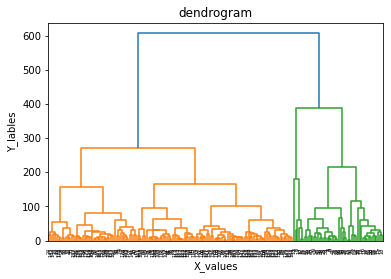

In [24]:
#knowing the number of clusters from the dendrogram
import scipy.cluster.hierarchy as sch
den=sch.dendrogram(sch.linkage(df,'average'))
plt.title('dendrogram')
plt.xlabel('X_values')
plt.ylabel('Y_lables')

In [27]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')
y_pridect_2=cluster.fit_predict(df2)
y_pridect_2

array([1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [28]:
df2['cluster']=y_pridect_2

In [29]:
pca = PCA(n_components=2)
reduced_2=pd.DataFrame(pca.fit_transform(df),columns=['PCA1','PCA2'])
reduced_2['cluster']=y_pridect_2


In [30]:
reduced_2.head()

,PCA1,PCA2,cluster
0,318.564692,21.493411,1
1,303.099174,-5.363078,1
2,438.062522,-6.536921,1
3,733.240730,0.190342,2
4,-11.571149,18.490378,0


Visualizing

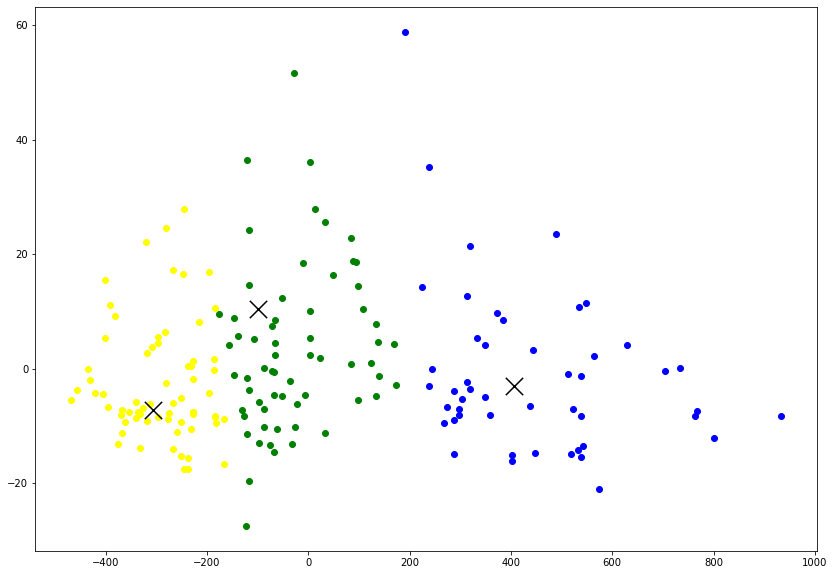

In [31]:
#plotting clusters

plt.figure(figsize=(14,10))
plt.scatter(reduced[reduced['cluster'] == 0].loc[:, 'PCA1'], reduced[reduced['cluster'] == 0].loc[:, 'PCA2'], color='blue')
plt.scatter(reduced[reduced['cluster'] == 1].loc[:, 'PCA1'], reduced[reduced['cluster'] == 1].loc[:, 'PCA2'], color='green')
plt.scatter(reduced[reduced['cluster'] == 2].loc[:, 'PCA1'], reduced[reduced['cluster'] == 2].loc[:, 'PCA2'], color='yellow')
#plotting centers
plt.scatter(x=reduced_centers[:,0],y=reduced_centers[:,1],color='black',marker='x',s=300)
plt.show()


In [32]:
table=pd.pivot_table(df2,index=['cluster'])
table

,Alcohol,Ash,Ash_Alcanity,Color_Intensity,Flavanoids,Hue,Magnesium,Malic_Acid,Nonflavanoid_Phenols,OD280,Proanthocyanins,Proline,Total_Phenols
cluster,,,,,,,,,,,,,
0,12.714077,2.346231,20.392308,4.844000,1.671308,0.912200,97.176923,2.506385,0.389846,2.429923,1.462385,583.369231,2.086692
1,13.725238,2.422857,17.178571,5.410000,2.928095,1.075238,106.547619,1.882143,0.288095,3.114762,1.899286,1141.119048,2.803095
2,14.136667,2.411667,16.266667,7.233333,3.493333,1.113333,107.666667,1.831667,0.271667,3.028333,2.216667,1530.333333,3.255000
